In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.stat import Correlation
import pyspark.sql.functions as F

In [2]:
spark= SparkSession.builder.getOrCreate()

In [3]:
import pandas as pd
pd.read_csv("data berobat.csv")

,Penduduk,Tahun,Provinsi,RS Pemerintah,RS Swasta,Praktek dokter/ Poliklinik,Puskesmas/ pustu,Praktek nakes,Praktek batra,Dukun bersalin,Lainnya,Jumlah
0,Laki-Laki,2009,Aceh,11.34,1.18,15.19,44.91,21.83,2.06,0.06,3.43,100.0
1,Laki-Laki,2009,Sumatera Utara,4.45,6.87,22.21,19.07,37.38,4.11,0.26,5.65,100.0
2,Laki-Laki,2009,Sumatera Barat,7.36,1.64,16.43,31.99,32.53,6.67,0.47,2.92,100.0
3,Laki-Laki,2009,Riau,9.31,9.63,28.53,33.62,13.52,1.50,0.16,3.72,100.0
4,Laki-Laki,2009,Jambi,7.69,2.13,23.39,43.89,16.22,2.61,0.06,4.01,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1045,perempuan,2023,Maluku,9.09,0.69,22.19,5.62,60.25,4.12,0.71,0.73,100.0
1046,perempuan,2023,Maluku Utara,12.17,0.92,12.92,4.93,59.65,10.31,1.02,0.88,100.0
1047,perempuan,2023,Papua Barat,12.95,2.32,6.69,7.47,69.00,1.46,0.78,0.90,100.0
1048,perempuan,2023,Papua,16.41,2.62,4.34,12.41,61.75,1.70,0.15,3.76,100.0


In [5]:
df=spark.read.csv("data berobat.csv", inferSchema=True, header=True)

In [6]:
df.show()

+---------+-----+--------------------+-------------+---------+--------------------------+----------------+-------------+-------------+--------------+-------+------+
| Penduduk|Tahun|            Provinsi|RS Pemerintah|RS Swasta|Praktek dokter/ Poliklinik|Puskesmas/ pustu|Praktek nakes|Praktek batra|Dukun bersalin|Lainnya|Jumlah|
+---------+-----+--------------------+-------------+---------+--------------------------+----------------+-------------+-------------+--------------+-------+------+
|Laki-Laki| 2009|                Aceh|        11.34|     1.18|                     15.19|           44.91|        21.83|         2.06|          0.06|   3.43|   100|
|Laki-Laki| 2009|      Sumatera Utara|         4.45|     6.87|                     22.21|           19.07|        37.38|         4.11|          0.26|   5.65|   100|
|Laki-Laki| 2009|      Sumatera Barat|         7.36|     1.64|                     16.43|           31.99|        32.53|         6.67|          0.47|   2.92|   100|
|Laki-Laki

In [7]:
df.count()

1050

In [8]:
len(df.columns)

12

In [9]:
df.printSchema()

root
 |-- Penduduk: string (nullable = true)
 |-- Tahun: integer (nullable = true)
 |-- Provinsi: string (nullable = true)
 |-- RS Pemerintah: double (nullable = true)
 |-- RS Swasta: double (nullable = true)
 |-- Praktek dokter/ Poliklinik: double (nullable = true)
 |-- Puskesmas/ pustu: double (nullable = true)
 |-- Praktek nakes: double (nullable = true)
 |-- Praktek batra: double (nullable = true)
 |-- Dukun bersalin: double (nullable = true)
 |-- Lainnya: double (nullable = true)
 |-- Jumlah: integer (nullable = true)



In [10]:
df.describe().show()

+-------+---------+-----------------+--------------+------------------+-----------------+--------------------------+------------------+------------------+------------------+------------------+-----------------+------+
|summary| Penduduk|            Tahun|      Provinsi|     RS Pemerintah|        RS Swasta|Praktek dokter/ Poliklinik|  Puskesmas/ pustu|     Praktek nakes|     Praktek batra|    Dukun bersalin|          Lainnya|Jumlah|
+-------+---------+-----------------+--------------+------------------+-----------------+--------------------------+------------------+------------------+------------------+------------------+-----------------+------+
|  count|     1050|             1050|          1050|              1038|             1038|                      1038|              1038|              1038|              1038|              1038|             1038|  1038|
|   mean|     NULL|           2016.0|          NULL| 8.469816955684006|4.862466281310218|          28.3562331406551|23.362225433

In [11]:
df.describe().show()

+-------+---------+-----------------+--------------+------------------+-----------------+--------------------------+------------------+------------------+------------------+------------------+-----------------+------+
|summary| Penduduk|            Tahun|      Provinsi|     RS Pemerintah|        RS Swasta|Praktek dokter/ Poliklinik|  Puskesmas/ pustu|     Praktek nakes|     Praktek batra|    Dukun bersalin|          Lainnya|Jumlah|
+-------+---------+-----------------+--------------+------------------+-----------------+--------------------------+------------------+------------------+------------------+------------------+-----------------+------+
|  count|     1050|             1050|          1050|              1038|             1038|                      1038|              1038|              1038|              1038|              1038|             1038|  1038|
|   mean|     NULL|           2016.0|          NULL| 8.469816955684006|4.862466281310218|          28.3562331406551|23.362225433

In [13]:
df.corr("Tahun","Jumlah")

0.11198789305803722

In [14]:
from pyspark.ml.feature import StringIndexer

In [15]:
df.printSchema()

root
 |-- Penduduk: string (nullable = true)
 |-- Tahun: integer (nullable = true)
 |-- Provinsi: string (nullable = true)
 |-- RS Pemerintah: double (nullable = true)
 |-- RS Swasta: double (nullable = true)
 |-- Praktek dokter/ Poliklinik: double (nullable = true)
 |-- Puskesmas/ pustu: double (nullable = true)
 |-- Praktek nakes: double (nullable = true)
 |-- Praktek batra: double (nullable = true)
 |-- Dukun bersalin: double (nullable = true)
 |-- Lainnya: double (nullable = true)
 |-- Jumlah: integer (nullable = true)



In [16]:
indexer = StringIndexer(inputCol="Tahun", outputCol="Tahun_cat")
indexed = indexer.fit(df).transform(df)

In [17]:
indexer = StringIndexer(inputCol="Jumlah", outputCol="Jumlah_cat")
indexed = indexer.fit(df).transform(df)

In [18]:
indexed.show()

+---------+-----+--------------------+-------------+---------+--------------------------+----------------+-------------+-------------+--------------+-------+------+----------+
| Penduduk|Tahun|            Provinsi|RS Pemerintah|RS Swasta|Praktek dokter/ Poliklinik|Puskesmas/ pustu|Praktek nakes|Praktek batra|Dukun bersalin|Lainnya|Jumlah|Jumlah_cat|
+---------+-----+--------------------+-------------+---------+--------------------------+----------------+-------------+-------------+--------------+-------+------+----------+
|Laki-Laki| 2009|                Aceh|        11.34|     1.18|                     15.19|           44.91|        21.83|         2.06|          0.06|   3.43|   100|       0.0|
|Laki-Laki| 2009|      Sumatera Utara|         4.45|     6.87|                     22.21|           19.07|        37.38|         4.11|          0.26|   5.65|   100|       0.0|
|Laki-Laki| 2009|      Sumatera Barat|         7.36|     1.64|                     16.43|           31.99|        32.53|

In [19]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler

In [20]:
indexed.columns

['Penduduk',
 'Tahun',
 'Provinsi',
 'RS Pemerintah',
 'RS Swasta',
 'Praktek dokter/ Poliklinik',
 'Puskesmas/ pustu',
 'Praktek nakes',
 'Praktek batra',
 'Dukun bersalin',
 'Lainnya',
 'Jumlah',
 'Jumlah_cat']

In [21]:
assembler = VectorAssembler(inputCols=("Tahun","RS Pemerintah","RS Swasta","Praktek dokter/ Poliklinik","Jumlah","Jumlah_cat"),
                            outputCol="features")

In [22]:
assembler

VectorAssembler_eeda2739111a

In [23]:
output = assembler.transform(indexed)

In [24]:
output.show()

+---------+-----+--------------------+-------------+---------+--------------------------+----------------+-------------+-------------+--------------+-------+------+----------+--------------------+
| Penduduk|Tahun|            Provinsi|RS Pemerintah|RS Swasta|Praktek dokter/ Poliklinik|Puskesmas/ pustu|Praktek nakes|Praktek batra|Dukun bersalin|Lainnya|Jumlah|Jumlah_cat|            features|
+---------+-----+--------------------+-------------+---------+--------------------------+----------------+-------------+-------------+--------------+-------+------+----------+--------------------+
|Laki-Laki| 2009|                Aceh|        11.34|     1.18|                     15.19|           44.91|        21.83|         2.06|          0.06|   3.43|   100|       0.0|[2009.0,11.34,1.1...|
|Laki-Laki| 2009|      Sumatera Utara|         4.45|     6.87|                     22.21|           19.07|        37.38|         4.11|          0.26|   5.65|   100|       0.0|[2009.0,4.45,6.87...|
|Laki-Laki| 200

In [27]:
output.select("features","Tahun").show(truncate=False)

+-----------------------------------+-----+
|features                           |Tahun|
+-----------------------------------+-----+
|[2009.0,11.34,1.18,15.19,100.0,0.0]|2009 |
|[2009.0,4.45,6.87,22.21,100.0,0.0] |2009 |
|[2009.0,7.36,1.64,16.43,100.0,0.0] |2009 |
|[2009.0,9.31,9.63,28.53,100.0,0.0] |2009 |
|[2009.0,7.69,2.13,23.39,100.0,0.0] |2009 |
|[2009.0,7.25,4.45,23.07,100.0,0.0] |2009 |
|[2009.0,8.61,1.98,25.83,100.0,0.0] |2009 |
|[2009.0,3.56,2.81,23.66,100.0,0.0] |2009 |
|[2009.0,5.07,4.45,26.63,100.0,0.0] |2009 |
|[2009.0,6.41,7.54,18.48,100.0,0.0] |2009 |
|[2009.0,6.88,7.4,48.64,100.0,0.0]  |2009 |
|[2009.0,4.68,3.04,36.46,100.0,0.0] |2009 |
|[2009.0,4.88,2.96,29.58,100.0,0.0] |2009 |
|[2009.0,10.15,8.83,35.01,100.0,0.0]|2009 |
|[2009.0,6.19,3.07,23.46,100.0,0.0] |2009 |
|[2009.0,2.93,4.56,40.26,100.0,0.0] |2009 |
|[2009.0,3.92,3.66,42.95,100.0,0.0] |2009 |
|[2009.0,5.28,0.46,21.32,100.0,0.0] |2009 |
|[2009.0,6.35,3.22,10.3,100.0,0.0]  |2009 |
|[2009.0,9.67,1.71,15.56,100.0,0

In [28]:
final_data = output.select("features","Tahun")

In [45]:
from pyspark.ml.regression import LinearRegression

In [29]:
final_data.show()

+--------------------+-----+
|            features|Tahun|
+--------------------+-----+
|[2009.0,11.34,1.1...| 2009|
|[2009.0,4.45,6.87...| 2009|
|[2009.0,7.36,1.64...| 2009|
|[2009.0,9.31,9.63...| 2009|
|[2009.0,7.69,2.13...| 2009|
|[2009.0,7.25,4.45...| 2009|
|[2009.0,8.61,1.98...| 2009|
|[2009.0,3.56,2.81...| 2009|
|[2009.0,5.07,4.45...| 2009|
|[2009.0,6.41,7.54...| 2009|
|[2009.0,6.88,7.4,...| 2009|
|[2009.0,4.68,3.04...| 2009|
|[2009.0,4.88,2.96...| 2009|
|[2009.0,10.15,8.8...| 2009|
|[2009.0,6.19,3.07...| 2009|
|[2009.0,2.93,4.56...| 2009|
|[2009.0,3.92,3.66...| 2009|
|[2009.0,5.28,0.46...| 2009|
|[2009.0,6.35,3.22...| 2009|
|[2009.0,9.67,1.71...| 2009|
+--------------------+-----+
only showing top 20 rows



In [50]:
train_data, test_data = data.randomSplit([0.8, 0.2], seed=1234)

In [54]:
train_data.show()

+---------+-----+--------------------+-------------+---------+--------------------------+----------------+-------------+-------------+--------------+-------+------+
| Penduduk|Tahun|            Provinsi|RS Pemerintah|RS Swasta|Praktek dokter/ Poliklinik|Puskesmas/ pustu|Praktek nakes|Praktek batra|Dukun bersalin|Lainnya|Jumlah|
+---------+-----+--------------------+-------------+---------+--------------------------+----------------+-------------+-------------+--------------+-------+------+
|Laki-Laki| 2009|                Aceh|        11.34|     1.18|                     15.19|           44.91|        21.83|         2.06|          0.06|   3.43|   100|
|Laki-Laki| 2009|              Banten|         2.93|     4.56|                     40.26|           26.19|        22.65|         0.82|          0.03|   2.56|   100|
|Laki-Laki| 2009|            Bengkulu|         8.61|     1.98|                     25.83|           28.74|        26.43|         3.35|          0.76|   4.29|   100|
|Laki-Laki

In [56]:
test_data.show()

+---------+-----+--------------------+-------------+---------+--------------------------+----------------+-------------+-------------+--------------+-------+------+
| Penduduk|Tahun|            Provinsi|RS Pemerintah|RS Swasta|Praktek dokter/ Poliklinik|Puskesmas/ pustu|Praktek nakes|Praktek batra|Dukun bersalin|Lainnya|Jumlah|
+---------+-----+--------------------+-------------+---------+--------------------------+----------------+-------------+-------------+--------------+-------+------+
|Laki-Laki| 2009|                Bali|         3.92|     3.66|                     42.95|           22.77|        24.23|         1.42|           0.0|   1.05|   100|
|Laki-Laki| 2009|       DI Yogyakarta|        10.15|     8.83|                     35.01|           29.64|        13.27|         1.19|           0.0|    1.9|   100|
|Laki-Laki| 2009|        Maluku Utara|        14.01|     0.42|                     14.35|            53.2|        12.56|         0.42|          0.21|   4.83|   100|
|Laki-Laki

In [57]:
from pyspark.ml.regression import LinearRegression

In [49]:
lr = LinearRegression(featuresCol="features",
                     labelCol="Jumlah")

In [52]:
spark = SparkSession.builder.appName("data berobat").getOrCreate()

In [60]:
inflasi_df.show(5)
inflasi_df.printSchema()

+---------+-----+--------------+-------------+---------+--------------------------+----------------+-------------+-------------+--------------+-------+------+
| Penduduk|Tahun|      Provinsi|RS Pemerintah|RS Swasta|Praktek dokter/ Poliklinik|Puskesmas/ pustu|Praktek nakes|Praktek batra|Dukun bersalin|Lainnya|Jumlah|
+---------+-----+--------------+-------------+---------+--------------------------+----------------+-------------+-------------+--------------+-------+------+
|Laki-Laki| 2009|          Aceh|        11.34|     1.18|                     15.19|           44.91|        21.83|         2.06|          0.06|   3.43|   100|
|Laki-Laki| 2009|Sumatera Utara|         4.45|     6.87|                     22.21|           19.07|        37.38|         4.11|          0.26|   5.65|   100|
|Laki-Laki| 2009|Sumatera Barat|         7.36|     1.64|                     16.43|           31.99|        32.53|         6.67|          0.47|   2.92|   100|
|Laki-Laki| 2009|          Riau|         9.31|

In [65]:
train_data, test_data = final_data.randomSplit([0.8, 0.2])

In [5]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [6]:
spark = SparkSession.builder.appName("data berobat.csv").getOrCreate()

In [11]:
file_path = "data berobat.csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)


In [12]:
data.printSchema()

root
 |-- Penduduk: string (nullable = true)
 |-- Tahun: integer (nullable = true)
 |-- Provinsi: string (nullable = true)
 |-- RS Pemerintah: double (nullable = true)
 |-- RS Swasta: double (nullable = true)
 |-- Praktek dokter/ Poliklinik: double (nullable = true)
 |-- Puskesmas/ pustu: double (nullable = true)
 |-- Praktek nakes: double (nullable = true)
 |-- Praktek batra: double (nullable = true)
 |-- Dukun bersalin: double (nullable = true)
 |-- Lainnya: double (nullable = true)
 |-- Jumlah: integer (nullable = true)



In [30]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("YourAppName").getOrCreate()

In [84]:
from pyspark.sql import SparkSession


In [85]:
spark = SparkSession.builder.appName("DataVisualizationExample").getOrCreate()


In [87]:
dataset_path = 'data berobat.csv'
data = spark.read.csv(dataset_path, header=True, inferSchema=True)


In [88]:
data.show(10)

+---------+-----+--------------------+-------------+---------+--------------------------+----------------+-------------+-------------+--------------+-------+------+
| Penduduk|Tahun|            Provinsi|RS Pemerintah|RS Swasta|Praktek dokter/ Poliklinik|Puskesmas/ pustu|Praktek nakes|Praktek batra|Dukun bersalin|Lainnya|Jumlah|
+---------+-----+--------------------+-------------+---------+--------------------------+----------------+-------------+-------------+--------------+-------+------+
|Laki-Laki| 2009|                Aceh|        11.34|     1.18|                     15.19|           44.91|        21.83|         2.06|          0.06|   3.43|   100|
|Laki-Laki| 2009|      Sumatera Utara|         4.45|     6.87|                     22.21|           19.07|        37.38|         4.11|          0.26|   5.65|   100|
|Laki-Laki| 2009|      Sumatera Barat|         7.36|     1.64|                     16.43|           31.99|        32.53|         6.67|          0.47|   2.92|   100|
|Laki-Laki

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

In [97]:
column_to_visualize = "Tahun" 

In [91]:
pandas_df = data.select(column_to_visualize).toPandas()

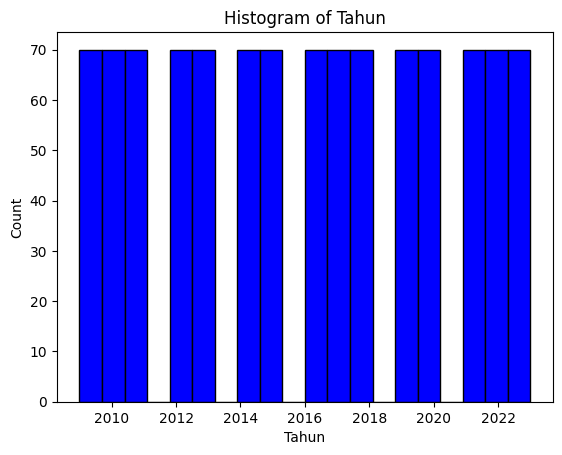

In [92]:
plt.hist(pandas_df[column_to_visualize], bins=20, color='blue', edgecolor='black')
plt.xlabel(column_to_visualize)
plt.ylabel('Count')
plt.title(f'Histogram of {column_to_visualize}')
plt.show()

In [93]:
column_to_visualize = "RS Pemerintah"

In [94]:
pandas_df = data.select(column_to_visualize).toPandas()

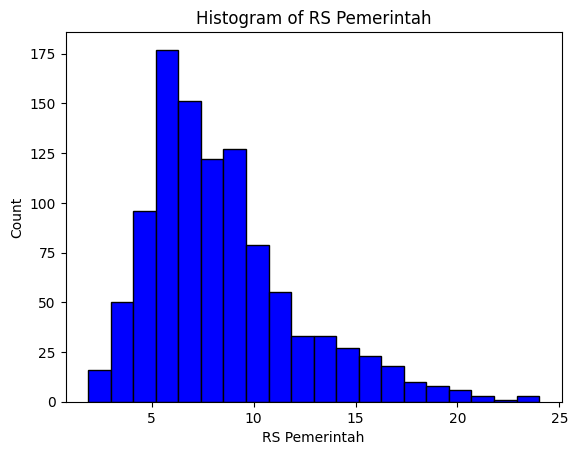

In [95]:
plt.hist(pandas_df[column_to_visualize], bins=20, color='blue', edgecolor='black')
plt.xlabel(column_to_visualize)
plt.ylabel('Count')
plt.title(f'Histogram of {column_to_visualize}')
plt.show()

In [98]:
column_to_visualize = "RS Swasta"

In [99]:
pandas_df = data.select(column_to_visualize).toPandas()

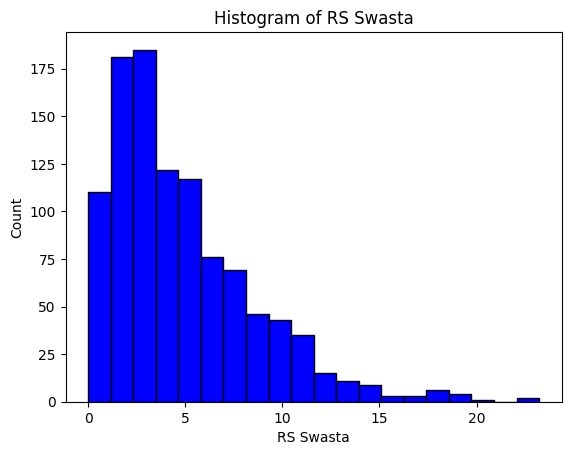

In [100]:
plt.hist(pandas_df[column_to_visualize], bins=20, color='blue', edgecolor='black')
plt.xlabel(column_to_visualize)
plt.ylabel('Count')
plt.title(f'Histogram of {column_to_visualize}')
plt.show()

In [101]:
column_to_visualize = "Penduduk"

In [102]:
pandas_df = data.select(column_to_visualize).toPandas()

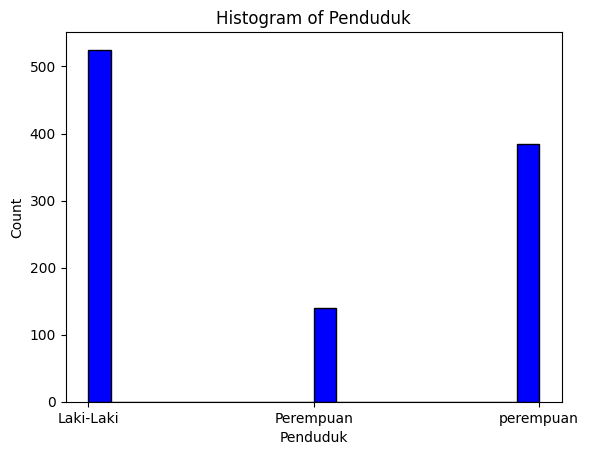

In [103]:
plt.hist(pandas_df[column_to_visualize], bins=20, color='blue', edgecolor='black')
plt.xlabel(column_to_visualize)
plt.ylabel('Count')
plt.title(f'Histogram of {column_to_visualize}')
plt.show()

In [104]:
column_to_visualize = "Provinsi"

In [105]:
pandas_df = data.select(column_to_visualize).toPandas()

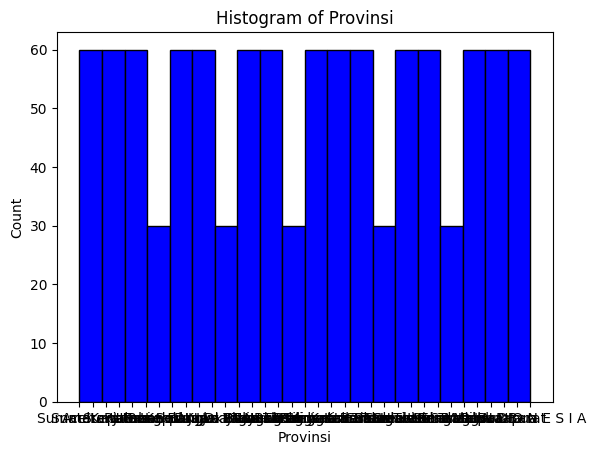

In [106]:
plt.hist(pandas_df[column_to_visualize], bins=20, color='blue', edgecolor='black')
plt.xlabel(column_to_visualize)
plt.ylabel('Count')
plt.title(f'Histogram of {column_to_visualize}')
plt.show()

In [107]:
column_to_visualize = "Praktek dokter/ Poliklinik"

In [108]:
pandas_df = data.select(column_to_visualize).toPandas()

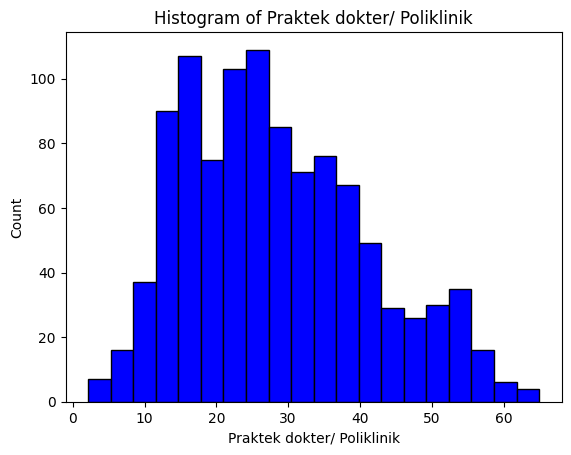

In [109]:
plt.hist(pandas_df[column_to_visualize], bins=20, color='blue', edgecolor='black')
plt.xlabel(column_to_visualize)
plt.ylabel('Count')
plt.title(f'Histogram of {column_to_visualize}')
plt.show()

In [118]:
column_to_visualize = "Puskesmas/ pustu"

In [120]:
pandas_df = data.select(column_to_visualize).toPandas()

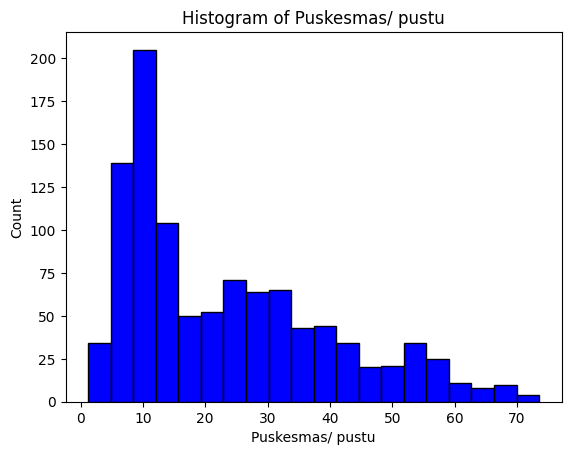

In [121]:
plt.hist(pandas_df[column_to_visualize], bins=20, color='blue', edgecolor='black')
plt.xlabel(column_to_visualize)
plt.ylabel('Count')
plt.title(f'Histogram of {column_to_visualize}')
plt.show()

In [122]:
column_to_visualize = "Praktek nakes"

In [123]:
pandas_df = data.select(column_to_visualize).toPandas()

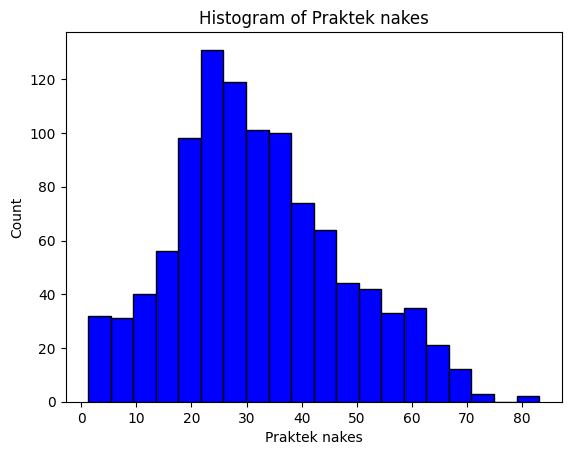

In [125]:
plt.hist(pandas_df[column_to_visualize], bins=20, color='blue', edgecolor='black')
plt.xlabel(column_to_visualize)
plt.ylabel('Count')
plt.title(f'Histogram of {column_to_visualize}')
plt.show()

In [126]:
column_to_visualize = "Praktek batra"

In [127]:
pandas_df = data.select(column_to_visualize).toPandas()

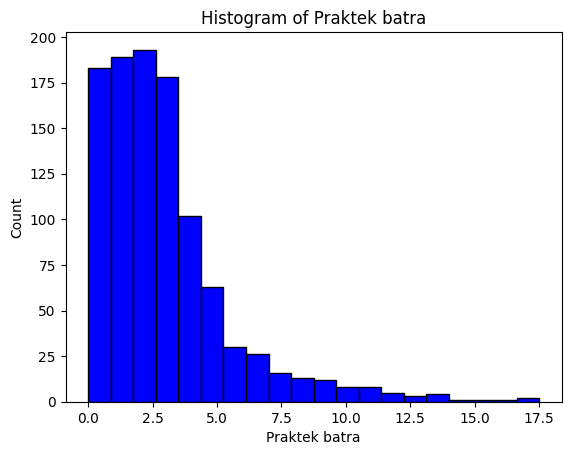

In [128]:
plt.hist(pandas_df[column_to_visualize], bins=20, color='blue', edgecolor='black')
plt.xlabel(column_to_visualize)
plt.ylabel('Count')
plt.title(f'Histogram of {column_to_visualize}')
plt.show()

In [129]:
column_to_visualize = "Dukun bersalin"

In [130]:
pandas_df = data.select(column_to_visualize).toPandas()

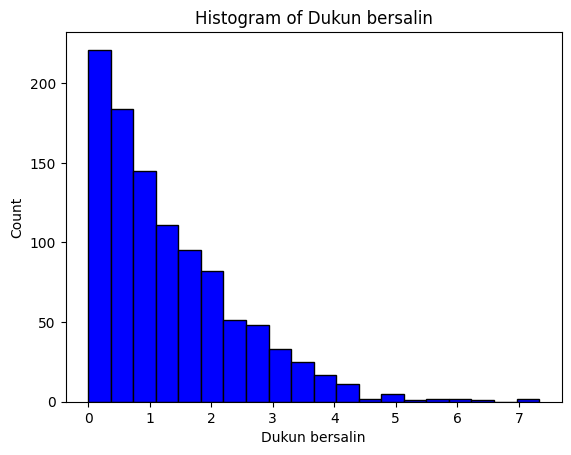

In [131]:
plt.hist(pandas_df[column_to_visualize], bins=20, color='blue', edgecolor='black')
plt.xlabel(column_to_visualize)
plt.ylabel('Count')
plt.title(f'Histogram of {column_to_visualize}')
plt.show()

In [132]:
column_to_visualize = "Lainnya"

In [133]:
pandas_df = data.select(column_to_visualize).toPandas()

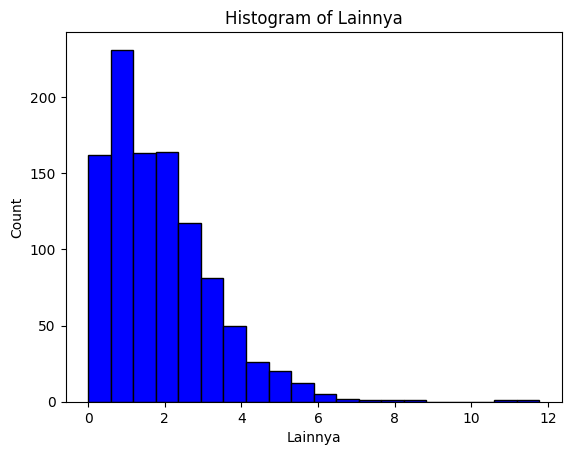

In [134]:
plt.hist(pandas_df[column_to_visualize], bins=20, color='blue', edgecolor='black')
plt.xlabel(column_to_visualize)
plt.ylabel('Count')
plt.title(f'Histogram of {column_to_visualize}')
plt.show()

In [135]:
column_to_visualize = "Lainnya"

In [136]:
pandas_df = data.select(column_to_visualize).toPandas()

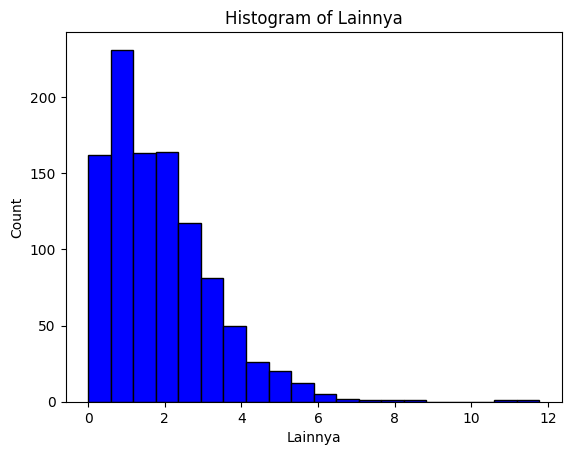

In [137]:
plt.hist(pandas_df[column_to_visualize], bins=20, color='blue', edgecolor='black')
plt.xlabel(column_to_visualize)
plt.ylabel('Count')
plt.title(f'Histogram of {column_to_visualize}')
plt.show()